# Partie 2 : Filtrage fréquentiel
## Manipulation 1 :
### Importation des librairies 

In [1]:
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
import cmath as math
import numpy
import random
import os

#### Lecture de l'image **goldhill.bmp**, transformation en niveaux de gris de cette image et ajout d'un bruit gaussien de moyenne nulle et d'écart-type $\sigma = 0.01$

(576, 720)


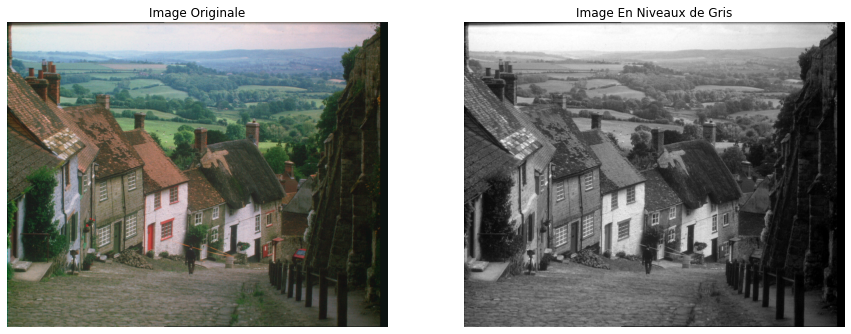

In [11]:
img1 = cv.imread('images/goldhill.bmp')
img=cv.cvtColor(img1,cv.COLOR_BGR2GRAY)
print(img.shape)

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(cv.cvtColor(img1, cv.COLOR_BGR2RGB))
plt.title("Image Originale")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.title("Image En Niveaux de Gris")
plt.show()

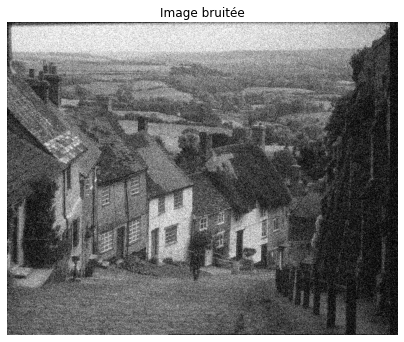

In [13]:
# On réutilise la fonction qu'on a utilisé durant la première partie, appliquant un bruit Gaussien
def bruit(image):
    h,l=image.shape
    gauss = np.array
    gauss = [[random.gauss(0,25) for j in range(0,l)] for i in range(0,h)]
    bruit=image+gauss
    for i in range(0,h):
        for j in range(0,l):
            if bruit[i,j]<0:
                bruit[i,j]=0
            elif bruit[i,j]>255:
                bruit[i,j]=255
            else:
                bruit[i,j]=bruit[i,j]
    bruit=np.uint8(bruit)
    return bruit
    
img_bruit=bruit(img)

plt.figure(figsize=(7,7))
plt.axis("off")
plt.imshow(img_bruit, cmap='gray')
plt.title("Image bruitée")
plt.show()

On voit bien l'application du bruit gaussien sur l'image avec cet aspect granuleux. 
#### Calcul de la transformée de Fourier discrète de l’image

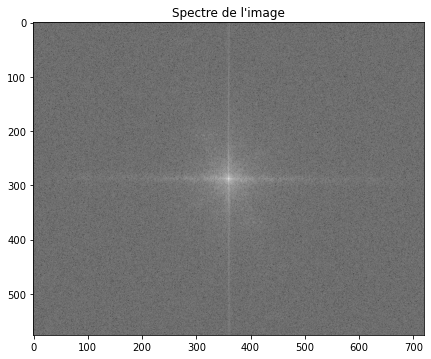

In [16]:
f = np.fft.fft2(img_bruit)
fshift = np.fft.fftshift(f)
mag_spectrum = 20*np.log(np.abs(fshift))

plt.figure(figsize=(7,7))
plt.imshow(mag_spectrum,cmap='gray')
plt.title("Spectre de l'image")
plt.show()

On voit bien à travers ce spectre, la partie basse fréquence au centre de la représentation, et plus on s'en éloigne on monte en fréquence, les hautes fréquences sont symbolisées par les bruits qu'on a appliqué ainsi que les changements brusques de couleur (les contours), maintenant on va générer la fonction de transfert du filtre.
### Filtre passe-bas
#### Génération et affichage la fonction de transfert du filtre H

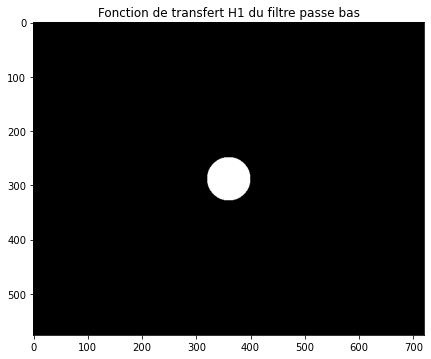

In [25]:
nl,nc=img_bruit.shape
Fc1= 40
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H1 = z<Fc1

plt.figure(figsize=(7,7))
plt.imshow(H1,cmap='gray')
plt.title("Fonction de transfert H1 du filtre passe bas")
plt.show()

On voit bien que c'est un filtre passe-bas, le cercle en blanc au centre est la partie du spectre qui sera gardée et le reste sera mise à 0. Maintenant on va procéder à la multiplication de cette fonction de transfert avec le spectre de notre image. 
#### Multiplication du spectre de l’image f par la fonction de transfert H

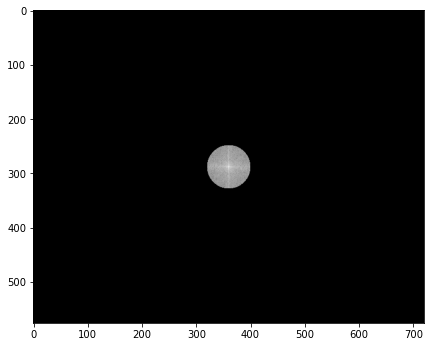

In [26]:
spectre_passbas = mag_spectrum*H1

plt.figure(figsize=(7,7))
plt.imshow(spectre_passbas,cmap='gray') 
plt.show() 

On voit bien le filtrage (fenêtrage) du spectre suivant la fenêtre du passe-bas, on procède maintenant à la transformée de Fourier inverse et on affiche le résultat. 
#### Transformée de Fourier inverse et affichage de l'image filtrée

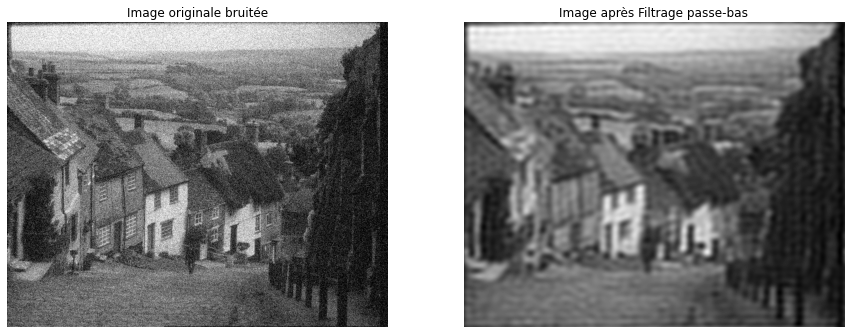

In [30]:
f_ishift_bas = np.fft.ifftshift(fshift*H1)
img_bas = np.fft.ifft2(f_ishift_bas)
img_bas = np.real(img_bas)
img_bas = np.uint8(img_bas)

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img_bruit, cmap='gray')
plt.title("Image originale bruitée")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img_bas,cmap='gray')
plt.title("Image après filtrage passe-bas")
plt.show()

On voit très bien que le filtrage passe-bas impacte le bruit gaussien et lisse énormément l'image (filtrage de lissage) et par conséquent il applique un flou sur l'image. On peut ajuster la fréquence de coupure de notre filtre pour ajuster le filtrage. 

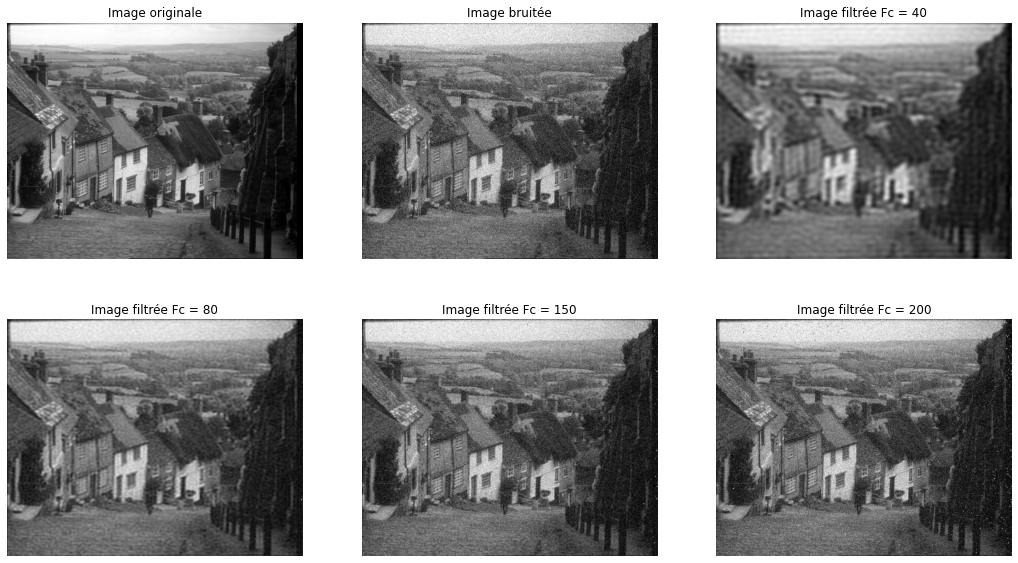

In [33]:
Fc1 = 40
Fc2 = 80
Fc3 = 150
Fc4 = 200
H1 = z<Fc1
H2 = z<Fc2
H3 = z<Fc3
H4 = z<Fc4

f_ishift_bas = np.fft.ifftshift(fshift*H1)
img_bas = np.fft.ifft2(f_ishift_bas)
img_bas = np.real(img_bas)
img_bas = np.uint8(img_bas)

f_ishift_bas2 = np.fft.ifftshift(fshift*H2)
img_bas2 = np.fft.ifft2(f_ishift_bas2)
img_bas2 = np.real(img_bas2)
img_bas2 = np.uint8(img_bas2)

f_ishift_bas3 = np.fft.ifftshift(fshift*H3)
img_bas3 = np.fft.ifft2(f_ishift_bas3)
img_bas3 = np.real(img_bas3)
img_bas3 = np.uint8(img_bas3)

f_ishift_bas4 = np.fft.ifftshift(fshift*H4)
img_bas4 = np.fft.ifft2(f_ishift_bas4)
img_bas4 = np.real(img_bas4)
img_bas4 = np.uint8(img_bas4)



plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.title("Image originale")

plt.subplot(2,3,2)
plt.axis("off")
plt.imshow(img_bruit,cmap='gray')
plt.title("Image bruitée")

plt.subplot(2,3,3)
plt.axis("off")
plt.imshow(img_bas,cmap='gray')
plt.title("Image filtrée Fc = 40")

plt.subplot(2,3,4)
plt.axis("off")
plt.imshow(img_bas2,cmap='gray')
plt.title("Image filtrée Fc = 80")

plt.subplot(2,3,5)
plt.axis("off")
plt.imshow(img_bas3,cmap='gray')
plt.title("Image filtrée Fc = 150")

plt.subplot(2,3,6)
plt.axis("off")
plt.imshow(img_bas4,cmap='gray')
plt.title("Image filtrée Fc = 200")

plt.show()

On voit bien qu'en augmentant la fréquence de coupure, le flou diminue sur l'image mais néanmoins l'impact sur le bruit est moindre, donc il faudra faire un compromis, comme ici on peut voir que la fréquence de coupure de 150 est adéquate, ca n'applique pas énormément de flou et ca élimine assez de bruit. 
### Filtre passe-haut

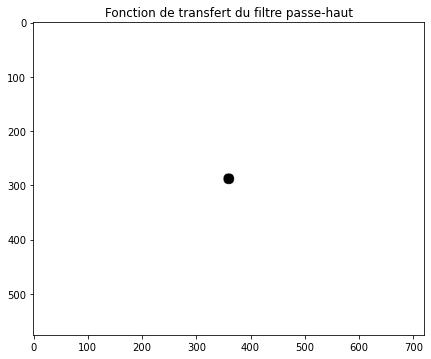

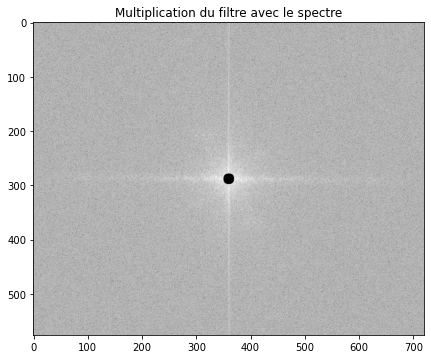

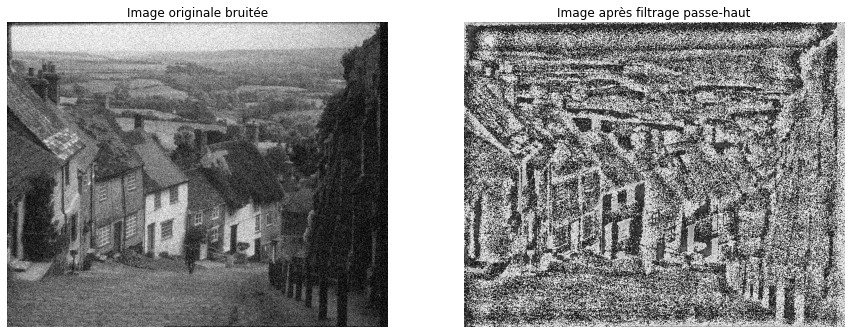

In [35]:
nl,nc=img_bruit.shape
Fc_haut= 10
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H_h1 = z>Fc_haut

plt.figure(figsize=(7,7))
plt.imshow(H_h1,cmap='gray')
plt.title("Fonction de transfert du filtre passe-haut")
plt.show()

spectre_transfer_haut = H_h1*mag_spectrum

plt.figure(figsize=(7,7))
plt.imshow(spectre_transfer_haut,cmap='gray')
plt.title("Multiplication du filtre avec le spectre")
plt.show()

f_ishift_haut = np.fft.ifftshift(fshift*H_h1)
img_haut = np.fft.ifft2(f_ishift_haut)
img_haut = np.real(img_haut)
img_haut = np.uint8(img_haut)

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img_bruit, cmap='gray')
plt.title("Image originale bruitée")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img_haut,cmap='gray')
plt.title("Image après filtrage passe-haut")
plt.show()

On voit bien ici le filtrage passe-haut, au niveau du spectre tels qu'à partir d'une certaine fréquence il laisse le spectre intacte, et lors de la restitution de l'image après filtrage on voit bien qu'on perd les zones homogènes à faible variation de fréquence, on garde les contours ce qui est l'effet d'un filtre passe-haut, on peut ajuster la fréquence de coupure du filtre passe-haut pour en voir l'intérêt.  

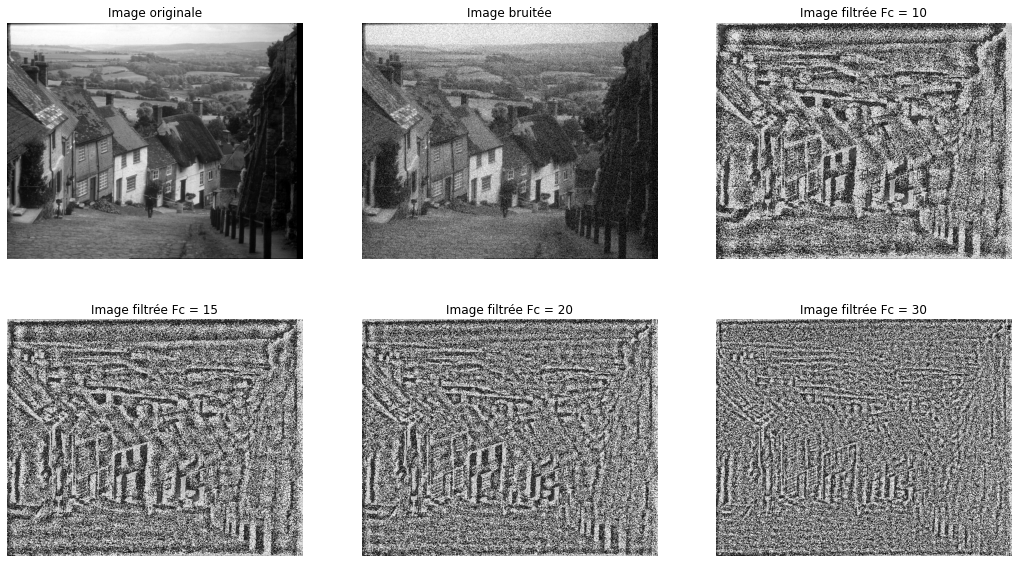

In [38]:
Fc1 = 10
Fc2 = 15
Fc3 = 20
Fc4 = 30
H_h1 = z>Fc1
H_h2 = z>Fc2
H_h3 = z>Fc3
H_h4 = z>Fc4

f_ishift_haut = np.fft.ifftshift(fshift*H_h1)
img_haut = np.fft.ifft2(f_ishift_haut)
img_haut = np.real(img_haut)
img_haut = np.uint8(img_haut)

f_ishift_haut2 = np.fft.ifftshift(fshift*H_h2)
img_haut2 = np.fft.ifft2(f_ishift_haut2)
img_haut2 = np.real(img_haut2)
img_haut2 = np.uint8(img_haut2)

f_ishift_haut3 = np.fft.ifftshift(fshift*H_h3)
img_haut3 = np.fft.ifft2(f_ishift_haut3)
img_haut3 = np.real(img_haut3)
img_haut3 = np.uint8(img_haut3)

f_ishift_haut4 = np.fft.ifftshift(fshift*H_h4)
img_haut4 = np.fft.ifft2(f_ishift_haut4)
img_haut4 = np.real(img_haut4)
img_haut4 = np.uint8(img_haut4)



plt.figure(figsize=(18,10))
plt.subplot(2,3,1)
plt.axis("off")
plt.imshow(img, cmap='gray')
plt.title("Image originale")

plt.subplot(2,3,2)
plt.axis("off")
plt.imshow(img_bruit,cmap='gray')
plt.title("Image bruitée")

plt.subplot(2,3,3)
plt.axis("off")
plt.imshow(img_haut,cmap='gray')
plt.title("Image filtrée Fc = 10")

plt.subplot(2,3,4)
plt.axis("off")
plt.imshow(img_haut2,cmap='gray')
plt.title("Image filtrée Fc = 15")

plt.subplot(2,3,5)
plt.axis("off")
plt.imshow(img_haut3,cmap='gray')
plt.title("Image filtrée Fc = 20")

plt.subplot(2,3,6)
plt.axis("off")
plt.imshow(img_haut4,cmap='gray')
plt.title("Image filtrée Fc = 30")

plt.show()

On voit bien l'impact d'un filtrage passe haut, on perd toutes les zones homogènes, et en montant en fréquence de coupure, on peut perdre complètement les détails de notre image. 
### Filtre passe-bande

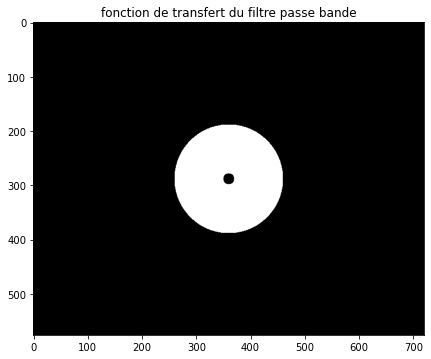

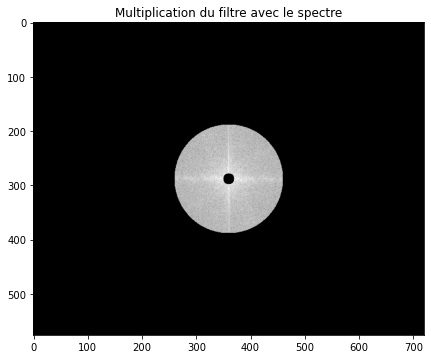

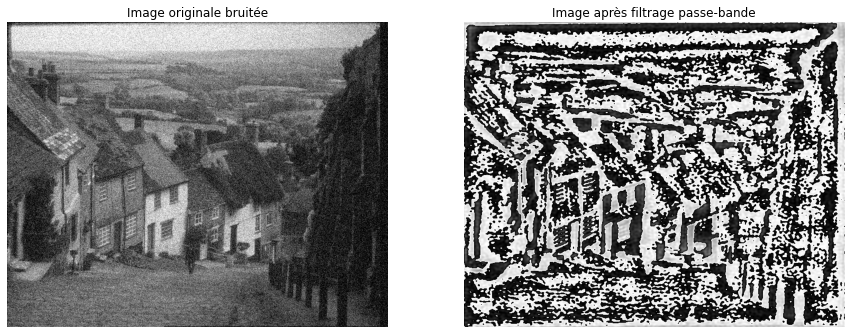

In [44]:
nl,nc=img_bruit.shape
Fc_pb3= 10
Fc_pb4= 100
x = np.arange(-nl/2,nl/2,1)
y = np.arange(-nc/2,nc/2,1)
xx, yy = np.meshgrid(y, x, sparse=True)
z = np.sqrt(xx*xx+yy*yy)
H_pb3 =z<Fc_pb4
H_pb4=Fc_pb3<z
H_pb5= H_pb3*H_pb4

plt.figure(figsize=(7,7))
plt.imshow(H_pb5,cmap='gray')
plt.title("fonction de transfert du filtre passe bande")
plt.show()

spectre_transfer_bande = H_pb5*mag_spectrum

plt.figure(figsize=(7,7))
plt.imshow(spectre_transfer_bande,cmap='gray')
plt.title("Multiplication du filtre avec le spectre")
plt.show()

f_ishift_bande = np.fft.ifftshift(fshift*H_pb5)
img_bande = np.fft.ifft2(f_ishift_bande)
img_bande = np.real(img_bande)
img_bande = np.uint8(img_bande)

plt.figure(figsize=(15,7))
plt.subplot(1,2,1)
plt.axis("off")
plt.imshow(img_bruit, cmap='gray')
plt.title("Image originale bruitée")

plt.subplot(1,2,2)
plt.axis("off")
plt.imshow(img_bande,cmap='gray')
plt.title("Image après filtrage passe-bande")
plt.show()

L'intérêt premier de ce genre de filtre est de mettre en valeur un certain niveau de gris ou une certaine bande de fréquence, on utilise communément ce genre de filtre dans des problème de segmentation et donc à ce niveau on voit un aspect de texture car le filtre ne laisse qu'une partie des fréquence passer, et donc on perd autant les hautes fréquences (les bruits entre autre par filtrage passe-bas) ainsi que les zones homogènes (filtrage passe-haut).
### Conclusion

On peut conclure sur l'intérêt de ce genre de filtre fréquentiels et sur leurs puissance sur la diminution de bruits (pour les filtres passe bas) pour la détection de contours et élimination des zones homogènes (pour les filtre passe haut) et pour la mise en valeur de bandes de fréquences particulières (pour le filtre passe bande) ce qui en fait un outil très puissant dans le traitement des images.